# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | callao
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | iskateley
Processing Record 4 of Set 1 | storvreta
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | huarmey
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | palikir - national government center
Processing Record 12 of Set 1 | espargos
City not found. Skipping...
Processing Record 13 of Set 1 | hammerfest
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | heishan
Processing Record 17 of Set 1 | kastsyukovichy
Processing Record 18 of Set 1 | homestead meadows north
Processing Record 19 of Set 1 | natal
Processing Record 20 of Set 1 | polyarnyy
Processing Re

Processing Record 35 of Set 4 | williams lake
Processing Record 36 of Set 4 | awjilah
Processing Record 37 of Set 4 | wick
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | siverek
Processing Record 40 of Set 4 | west island
Processing Record 41 of Set 4 | kljuc
Processing Record 42 of Set 4 | danville
Processing Record 43 of Set 4 | shevchenko
Processing Record 44 of Set 4 | mocimboa
Processing Record 45 of Set 4 | coahuayana de hidalgo
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | campo largo
Processing Record 48 of Set 4 | tolanaro
Processing Record 49 of Set 4 | gadzhiyevo
Processing Record 0 of Set 5 | karpinsk
Processing Record 1 of Set 5 | tazacorte
Processing Record 2 of Set 5 | the pas
Processing Record 3 of Set 5 | bamboo flat
Processing Record 4 of Set 5 | tottori
Processing Record 5 of Set 5 | saipan
Processing Record 6 of Set 5 | recani
Processing Record 7 of Set 5 | zijinglu
Processing Record 8 of Set 5 | alice springs
Pro

Processing Record 27 of Set 8 | wanxian
Processing Record 28 of Set 8 | puerto aysen
Processing Record 29 of Set 8 | walvis bay
Processing Record 30 of Set 8 | cedeira
Processing Record 31 of Set 8 | tofol
Processing Record 32 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | huanuni
Processing Record 35 of Set 8 | timbuktu
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | yung shue wan
Processing Record 38 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 39 of Set 8 | kamar mushani
Processing Record 40 of Set 8 | punta del este
Processing Record 41 of Set 8 | ihsaniye
Processing Record 42 of Set 8 | bayganin
Processing Record 43 of Set 8 | mar del plata
Processing Record 44 of Set 8 | skovorodino
Processing Record 45 of Set 8 | upington
Processing Record 46 of Set 8 | newman
Processing Record 47 of Set 8 | vallenar
Processing Record 48 of Set 8 | 

Processing Record 14 of Set 12 | mount isa
Processing Record 15 of Set 12 | el porvenir
Processing Record 16 of Set 12 | turochak
Processing Record 17 of Set 12 | itacare
Processing Record 18 of Set 12 | leshan
Processing Record 19 of Set 12 | sao vicente
Processing Record 20 of Set 12 | pimenta bueno
Processing Record 21 of Set 12 | priozersk
Processing Record 22 of Set 12 | veymandoo
City not found. Skipping...
Processing Record 23 of Set 12 | aleg
Processing Record 24 of Set 12 | sharjah
Processing Record 25 of Set 12 | devils lake
Processing Record 26 of Set 12 | kilindoni
Processing Record 27 of Set 12 | melekeok village
Processing Record 28 of Set 12 | seaside
Processing Record 29 of Set 12 | vila velha
Processing Record 30 of Set 12 | tionk essil
Processing Record 31 of Set 12 | champerico
Processing Record 32 of Set 12 | castillos
Processing Record 33 of Set 12 | lethem
Processing Record 34 of Set 12 | cozumel
Processing Record 35 of Set 12 | burgersdorp
Processing Record 36 of

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [26]:
# Display sample data
city_data_df['Max Temp'] = city_data_df['Max Temp']- 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,callao,-12.0667,-77.1500,20.16,73,75,3.60,PE,1697144147
1,bethel,41.3712,-73.4140,21.05,52,0,1.54,US,1697144147
2,iskateley,67.6803,53.1512,1.12,76,100,4.02,RU,1697144147
3,storvreta,59.9667,17.7000,6.03,70,16,2.57,SE,1697144147
4,adamstown,-25.0660,-130.1015,20.84,70,97,5.15,PN,1697144148


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,20.16,73,75,3.60,PE,1697144147
1,bethel,41.3712,-73.4140,21.05,52,0,1.54,US,1697144147
2,iskateley,67.6803,53.1512,1.12,76,100,4.02,RU,1697144147
3,storvreta,59.9667,17.7000,6.03,70,16,2.57,SE,1697144147
4,adamstown,-25.0660,-130.1015,20.84,70,97,5.15,PN,1697144148


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

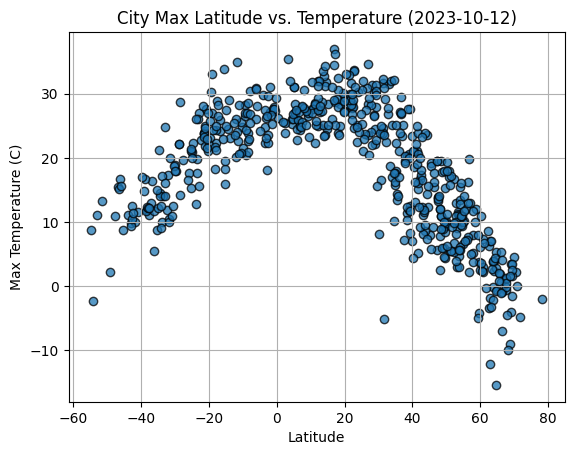

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.75, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-10-12)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

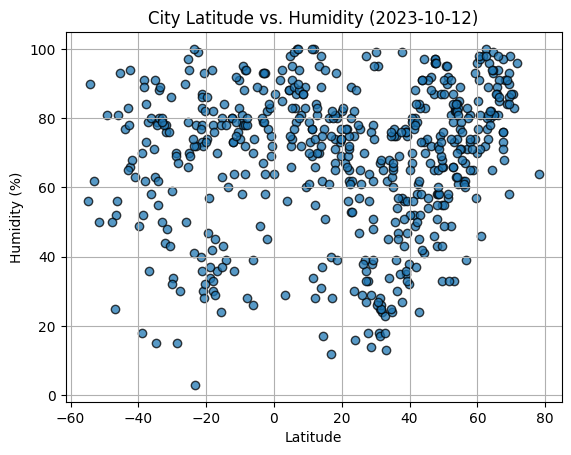

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.75, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-10-12)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

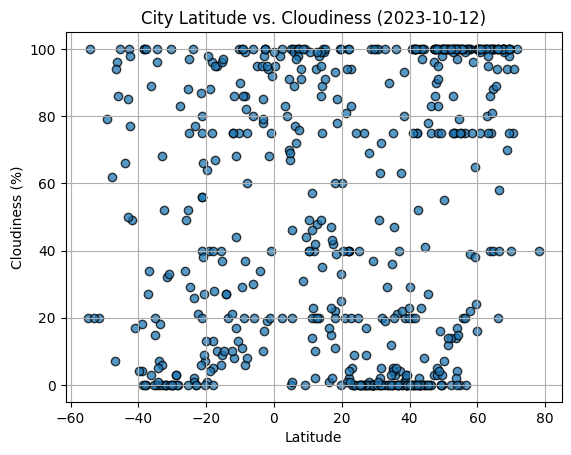

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.75, edgecolors = "black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-10-12)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

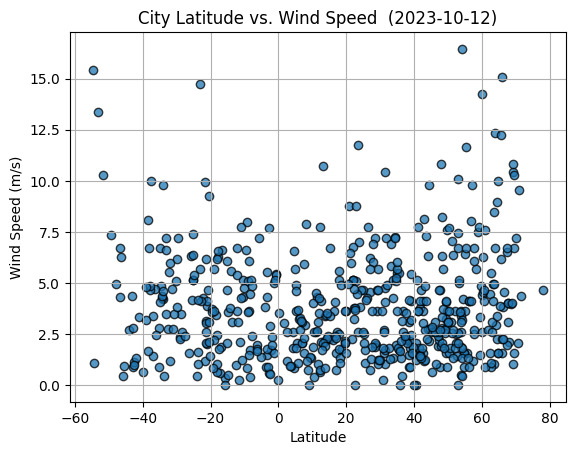

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.75, edgecolors = "black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed  (2023-10-12)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linear_regress(x_value, y_value, a, b, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_model = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_value, regress_model, "r-")
    plt.annotate(line_eq, (a,b), fontsize =15, color = "r")
    plt.scatter(x_value, y_value)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    return plt.show()
    

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,21.05,52,0,1.54,US,1697144147
2,iskateley,67.6803,53.1512,1.12,76,100,4.02,RU,1697144147
3,storvreta,59.9667,17.7000,6.03,70,16,2.57,SE,1697144147
8,constantia,44.1833,28.6500,14.38,73,0,6.31,RO,1697144046
9,palikir - national government center,6.9248,158.1611,24.41,100,100,2.06,FM,1697144149


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,20.16,73,75,3.60,PE,1697144147
4,adamstown,-25.0660,-130.1015,20.84,70,97,5.15,PN,1697144148
5,puerto natales,-51.7236,-72.4875,13.25,50,20,10.29,CL,1697144148
6,huarmey,-10.0681,-78.1522,21.47,74,90,4.76,PE,1697144148
7,margaret river,-33.9500,115.0667,10.06,88,7,4.20,AU,1697144148


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8580324066708898


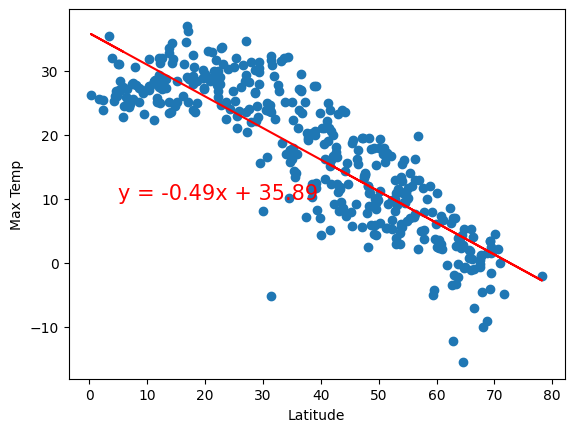

In [47]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_model = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot regression line
plt.plot(northern_hemi_df['Lat'], regress_model, "r-")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (5,10), fontsize =15, color = "r")
# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.8029591298609339


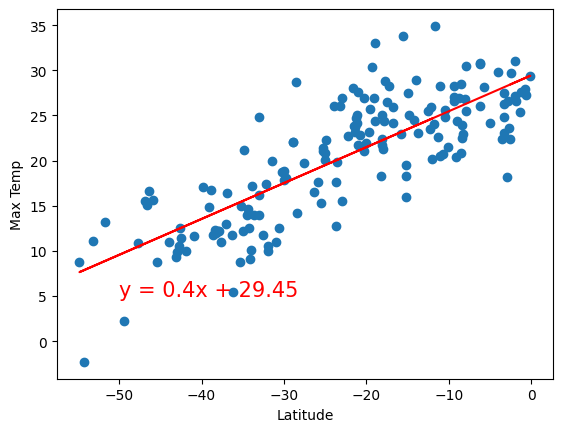

In [39]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -50, 5, "Max Temp")


**Discussion about the linear relationship:** In northern hemisphere, the temperature and latitude have a strong negative correlation, whereas in southern hemisphere, the temperatue and latitude have a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1499108237150111


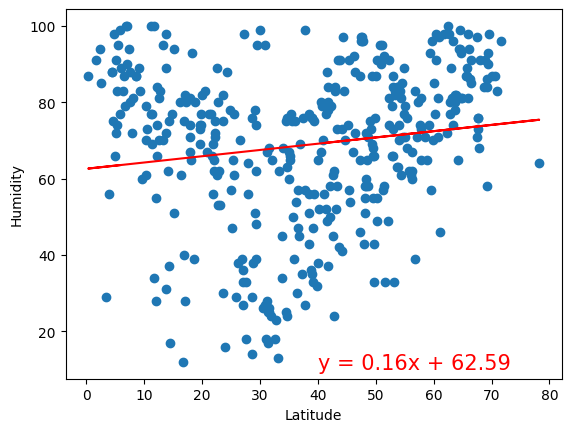

In [40]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 40, 10, "Humidity")

The r-value is: 0.09667695168995206


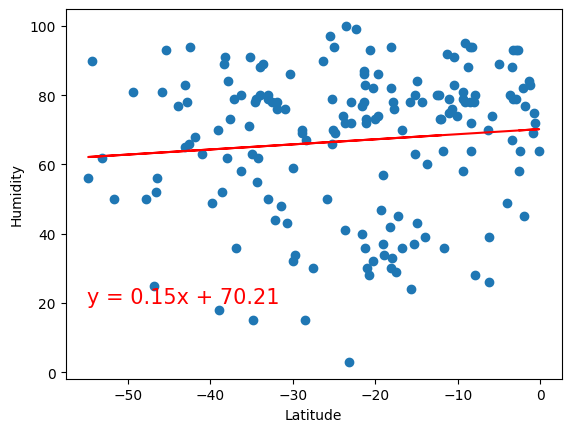

In [41]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 20, "Humidity")

**Discussion about the linear relationship:** In both northern and southern hemisphere, the humidity and latitude have a very weak positive almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23022716961911685


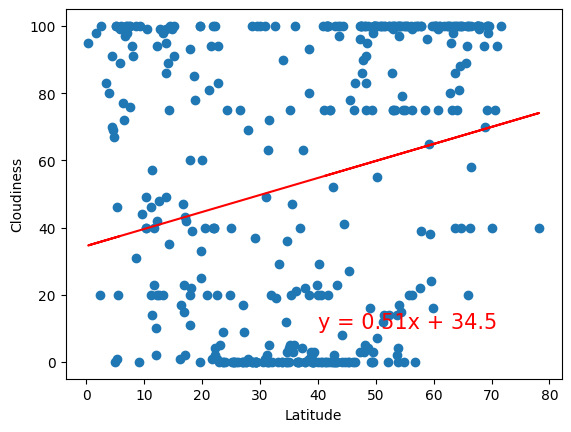

In [42]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 40, 10, "Cloudiness")

The r-value is: 0.16636458797336656


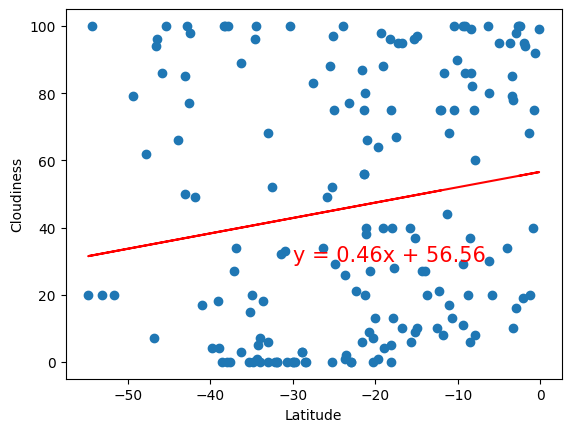

In [43]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -30, 30, "Cloudiness")

**Discussion about the linear relationship:** Both in northern and southern hemisphere, the cloudiness and latitude have very weak positive almost no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2041092321919661


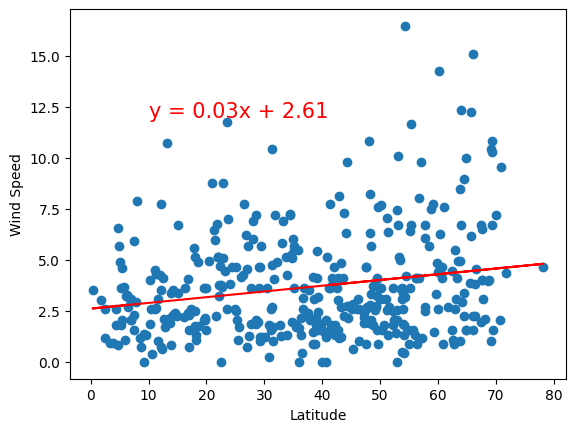

In [44]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 10, 12, "Wind Speed")

The r-value is: -0.22062159916766116


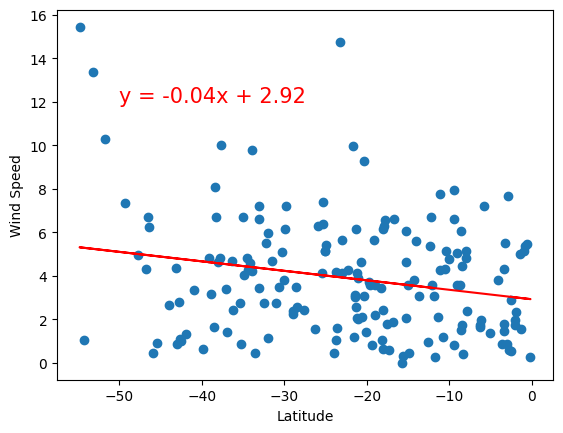

In [45]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -50, 12, "Wind Speed")

**Discussion about the linear relationship:** In northern hemisphere, the wind speed and latitude have a weak positive correlation, whereas in southern hemisphere, the wind speed and latitude have a weak negative correlation.